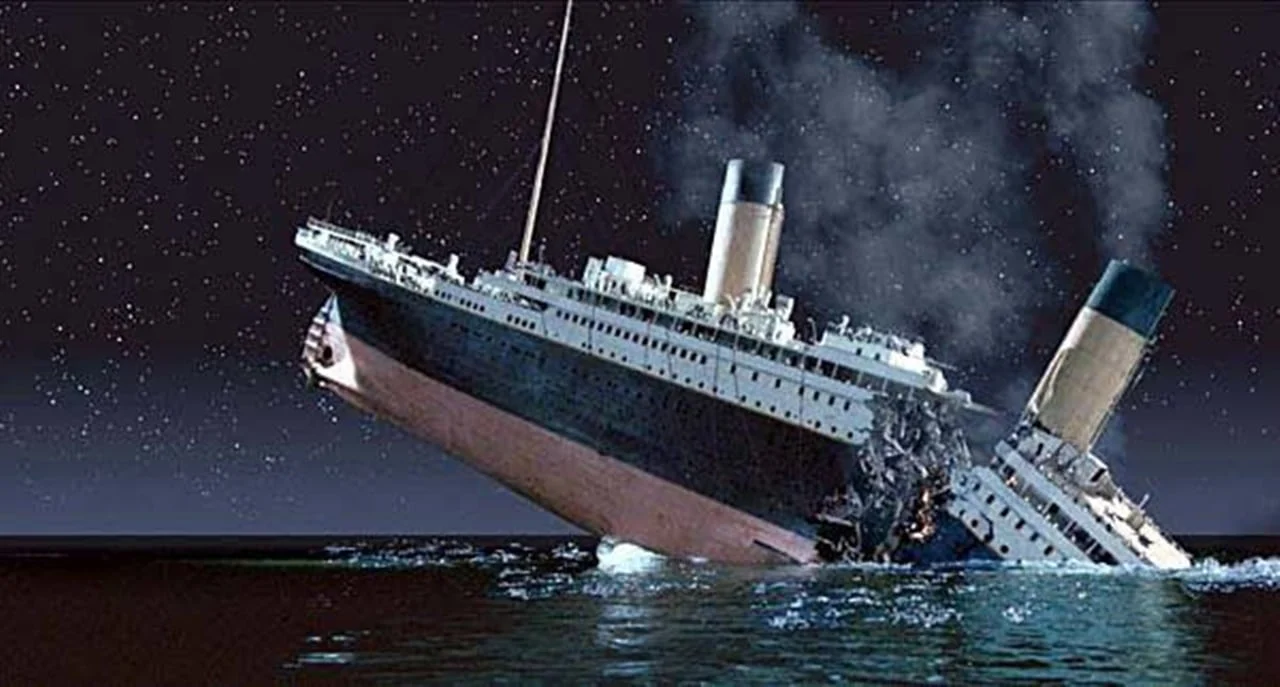

# Contexto do evento
[Naufrágio do RMS Titanic](https://pt.wikipedia.org/wiki/Naufr%C3%A1gio_do_RMS_Titanic)

# Titanic - Machine Learning from Disaster
Predição de  sobrevivência no Titanic

[Dataset](https://www.kaggle.com/c/titanic)

In [ ]:
# Metadados:

# Passenger ID: ID do passageiro (número único para cada um dos passageiros)
# Survived: sobrevivente (0 = Não, 1 = Sim)
# Pclass: Classe da passagem (1 = primeira classe, 2 = segunda classe, 3 = terceira classe)
# Name: nome do passageiro
# Sex: Gênero do passageiro
# Age: Idade (em anos) do passageiro
# SibSp: número de irmãos / cônjuges a bordo do Titanic
# Parch: número de pais / filhos a bordo do Titanic
# Ticket: número do ticket
# Fare: tarifa da passagem
# Cabin: número da cabine
# Embarked: porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

In [10]:
# import libs
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [11]:
# Datasets
df_gender_submission = pd.read_csv('gender_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [12]:
df_test['Age'].tail(10)

408     NaN
409     3.0
410     NaN
411    37.0
412    28.0
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, dtype: float64

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df_train.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [4]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [9]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
df_train.groupby(["Sex","Survived"])["PassengerId"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

<center style="font-size:18pt; background-color:#c9d976">
    <br/>
        <b style="color: #033409">
            Pandas Profiling
        </b>
    <br/>&nbsp;
</center>

In [5]:
profile = ProfileReport(df_train)

In [6]:
profile

In [ ]:
# profile.to_file("relatorio_Titanic.html")

<center style="font-size:18pt; background-color:#c9d976">
    <br/>
        <b style="color: #033409">
            RandomForestClassifier
        </b>
    <br/>&nbsp;
</center>

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)

In [22]:
# Obs: o modelo trabalha somente com variáveis numéricas. Os textos do datagrame precisam ser
#     transformados em número

In [23]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
df_train['Sex'].value_counts().sum()

891

In [25]:
# Substituir textos da coluna 'Sex' por valores '0 = male'  e '1 = female'
def sex(texto):
    if texto == 'female':
        return 1
    else:
        return 0

In [26]:
df_train['Sex_bin'] = df_train['Sex'].map(sex)
df_test['Sex_bin'] =  df_test['Sex'].map(sex)

In [27]:
df_train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  Sex_bin  
0      0  A/5 21171   7.2500   NaN        S        0  
1      0   PC 17599  71.2833   C85        C        1

In [28]:
# Passageiros com menos de 1 ano de idade
# QUESTIONAMENTO by geanclm: as idades em float podem interfir no modelo?
(df_train[df_train['Age']<1])

PassengerId  Survived  Pclass                             Name     Sex  \
78            79         1       2    Caldwell, Master. Alden Gates    male   
305          306         1       1   Allison, Master. Hudson Trevor    male   
469          470         1       3    Baclini, Miss. Helene Barbara  female   
644          645         1       3           Baclini, Miss. Eugenie  female   
755          756         1       2        Hamalainen, Master. Viljo    male   
803          804         1       3  Thomas, Master. Assad Alexander    male   
831          832         1       2  Richards, Master. George Sibley    male   

      Age  SibSp  Parch  Ticket      Fare    Cabin Embarked  Sex_bin  
78   0.83      0      2  248738   29.0000      NaN        S        0  
305  0.92      1      2  113781  151.5500  C22 C26        S        0  
469  0.75      2      1    2666   19.2583      NaN        C        1  
644  0.75      2      1    2666   19.2583      NaN        C        1  
755  0.67      1      1  250649   14.5000      NaN        S        0  
803  0.42      0      1    2625    8.5167      NaN        C        0  
831  0.83      1      1   29106   18.7500      NaN        S        0

In [29]:
var = ['Sex_bin', 'Age']

In [30]:
X = df_train[var]
y = df_train['Survived']

In [31]:
X.head()

Sex_bin   Age
0        0  22.0
1        1  38.0
2        1  26.0
3        1  35.0
4        0  35.0

In [17]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
# QUESTIONAMENTO by geanclm: a função fillna pode afetar o modelo?
X = X.fillna(-1)

In [33]:
modelo.fit(X,y)

RandomForestClassifier(n_jobs=1, random_state=0)

In [34]:
X_prev = df_test[var]

In [35]:
X_prev.head()

Sex_bin   Age
0        0  34.5
1        1  47.0
2        0  62.0
3        0  27.0
4        1  22.0

In [36]:
X_prev = X_prev.fillna(-1)

In [37]:
p = modelo.predict(X_prev)

In [38]:
p

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [39]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Sex_bin  
0  34.5      0      0   330911   7.8292   NaN        Q        0  
1  47.0      1      0   363272   7.0000   NaN        S        1  
2  62.0      0      0   240276   9.6875   NaN        Q        0  
3  27.0      0      0   315154   8.6625   NaN        S        0  
4  22.0      1      1  3101298  12.2875   NaN        S        1

# Sumission para o Kaggle

In [26]:
sub = pd.Series(p, index=df_test['PassengerId'], name='Survived')

In [27]:
sub.shape

(418,)

In [28]:
sub.to_csv('primeiro_modelo.csv',header=True)

In [67]:
# !type primeiro_modelo.csv

In [29]:
# Inshights
# by geanclm in 24/04/2022
# ---
# 1 - eliminar registros com dado de idade faltante
# 2 - arredondar idade
# 3 - converter coluna Age para inteiro

In [30]:
# TREINO
# VALIDAÇÃO
# TESTE

# ENTENDO O MÓDULO sklearn.model_selection

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_praticar_lib = np.arange(10)

In [12]:
X_praticar_lib

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
np.random.seed(0)
train_test_split(X_praticar_lib, test_size=0.3)

[array([9, 1, 6, 7, 3, 0, 5]), array([2, 8, 4])]

# SEPARANDO VARIÁVEIS EM TREINO E TESTE

In [40]:
np.random.seed(0)
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.5)

In [41]:
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape

((445, 2), (446, 2), (445,), (446,))

In [42]:
modelo.fit(X_tr, y_tr)

RandomForestClassifier(n_jobs=1, random_state=0)

In [43]:
p = modelo.predict(X_ts)

In [44]:
np.mean(y_ts == p)

0.7690582959641256

In [49]:
y_ts

495    0
648    0
278    0
31     1
255    1
      ..
327    1
827    1
102    0
625    0
108    0
Name: Survived, Length: 446, dtype: int64

In [45]:
p

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

In [59]:
p =(X_ts['Sex_bin']==1).astype(np.int64)
np.mean(y_ts == p)

0.7825112107623319

# Validação cruzada

In [55]:
# teste com a variável para entender o processo
X_praticar_lib

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
from sklearn.model_selection import KFold

In [57]:
kf = KFold(3, shuffle=True, random_state=0)
for linhas_treino, linhas_teste in kf.split(X_praticar_lib):
    print (f'teino {linhas_treino}')
    print (f'teste {linhas_teste}')
    print()

teino [0 1 3 5 6 7]
teste [2 4 8 9]

teino [0 2 3 4 5 8 9]
teste [1 6 7]

teino [1 2 4 6 7 8 9]
teste [0 3 5]



In [73]:
resultados = []
for rep in range(10):
    print(f'rep: {rep}')
    kf = KFold(2, shuffle=True, random_state=rep)
    for linhas_treino, linhas_teste in kf.split(X):
        print (f'teino {linhas_treino.shape[0]}')
        print (f'teste {linhas_teste.shape[0]}')
    #     print()
        X_tr, X_ts = X.iloc[linhas_treino], X.iloc[linhas_teste]    
        y_tr, y_ts = y.iloc[linhas_treino], y.iloc[linhas_teste]
    #     print(X_tr.head())
    #     print()
        modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
        modelo.fit(X_tr, y_tr)

        p = modelo.predict(X_ts)

        acc = np.mean(y_ts == p)
        resultados.append(acc)
        print(f'acc : {acc}')
        print()

rep: 0
teino 445
teste 446
acc : 0.7713004484304933

teino 446
teste 445
acc : 0.7797752808988764

rep: 1
teino 445
teste 446
acc : 0.7443946188340808

teino 446
teste 445
acc : 0.7955056179775281

rep: 2
teino 445
teste 446
acc : 0.7757847533632287

teino 446
teste 445
acc : 0.7887640449438202

rep: 3
teino 445
teste 446
acc : 0.7533632286995515

teino 446
teste 445
acc : 0.7573033707865169

rep: 4
teino 445
teste 446
acc : 0.7354260089686099

teino 446
teste 445
acc : 0.7415730337078652

rep: 5
teino 445
teste 446
acc : 0.7219730941704036

teino 446
teste 445
acc : 0.7056179775280899

rep: 6
teino 445
teste 446
acc : 0.7757847533632287

teino 446
teste 445
acc : 0.7303370786516854

rep: 7
teino 445
teste 446
acc : 0.7040358744394619

teino 446
teste 445
acc : 0.7348314606741573

rep: 8
teino 445
teste 446
acc : 0.7488789237668162

teino 446
teste 445
acc : 0.7887640449438202

rep: 9
teino 445
teste 446
acc : 0.7623318385650224

teino 446
teste 445
acc : 0.7842696629213484



In [77]:
len(resultados)

20

In [78]:
np.mean(resultados)

0.7550007557817302